# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [60]:
pip install pandas requests lxml


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**LIBRERIAS**

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io
import sqlite3


**OBTENCION DE DATOS**

In [62]:
url = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
response = requests.get(url)

print("Estado:", response.status_code)

Estado: 200


**TABLAS TOTALES**

In [ ]:
html = io.StringIO(response.text)
tables = pd.read_html(html)

print(f"Se encontraron {len(tables)} tablas.")

Se encontraron 27 tablas.


**EXTRACCION DE MUESTRAS**

In [ ]:
df = tables[0]
df.head()  

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.783,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.302,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.859,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.830,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.826,1 April 2022,[6]


**PROCESAMIENTO DE LOS DATOS**

In [ ]:
df.columns = ["Rank", "Song", "Artist", "Streams (billions)", "Date released", "Reference"]
df["Song"] = df["Song"].str.replace(r"\[.*?\]", "", regex=True)
df["Artist"] = df["Artist"].str.replace(r"\[.*?\]", "", regex=True)
df = df[df["Streams (billions)"].astype(str).str.contains(r"^\d+(?:\.\d+)?$", na=False)].copy()
df["Streams (billions)"] = df["Streams (billions)"].astype(float)
df["Date released"] = pd.to_datetime(df["Date released"], errors="coerce")

df


,Rank,Song,Artist,Streams (billions),Date released,Reference
0,1,"""Blinding Lights""",The Weeknd,4.783,2019-11-29,[2]
1,2,"""Shape of You""",Ed Sheeran,4.302,2017-01-06,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.859,2018-11-08,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.830,2016-09-21,[5]
4,5,"""As It Was""",Harry Styles,3.826,2022-04-01,[6]
...,...,...,...,...,...,...
95,96,"""Havana""",Camila Cabello and Young Thug,2.258,2017-08-03,[97]
96,97,"""Someone Like You""",Adele,2.255,2011-01-24,[98]
97,98,"""Die With A Smile""",Lady Gaga and Bruno Mars,2.248,2024-08-16,[99]
98,99,"""Memories""",Maroon 5,2.235,2019-09-20,[100]


**SQLITE**

In [ ]:
conn = sqlite3.connect('spotify_songs.db')
df.to_sql('songs', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

print("Datos almacenados en la base de datos SQLite con éxito.")

Datos almacenados en la base de datos SQLite con éxito.


**VISUALIZACION DE DATOS**

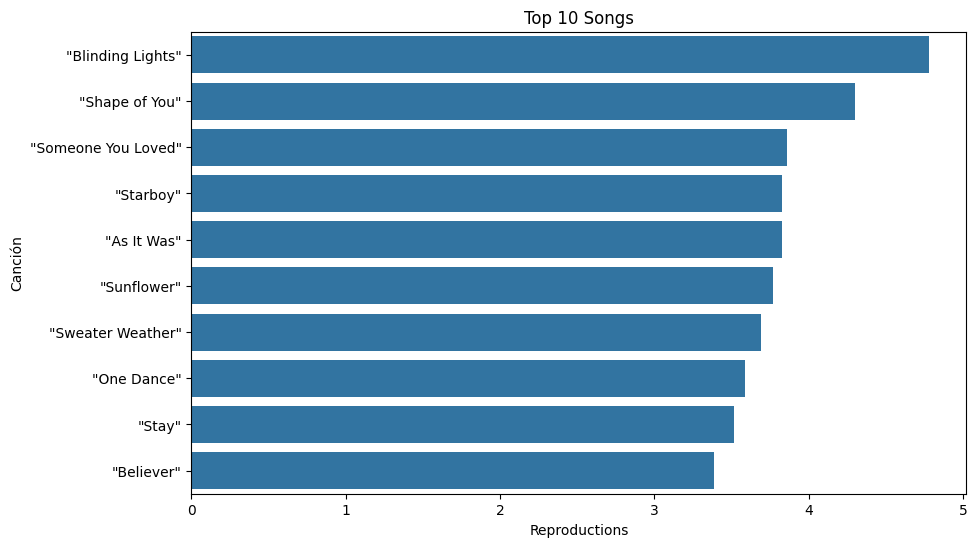

In [72]:
top_10 = df.nlargest(10, 'Streams (billions)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Streams (billions)', y='Song', data=top_10)
plt.title('Top 10 Songs')
plt.xlabel('Reproductions')
plt.ylabel('Canción')

plt.show()


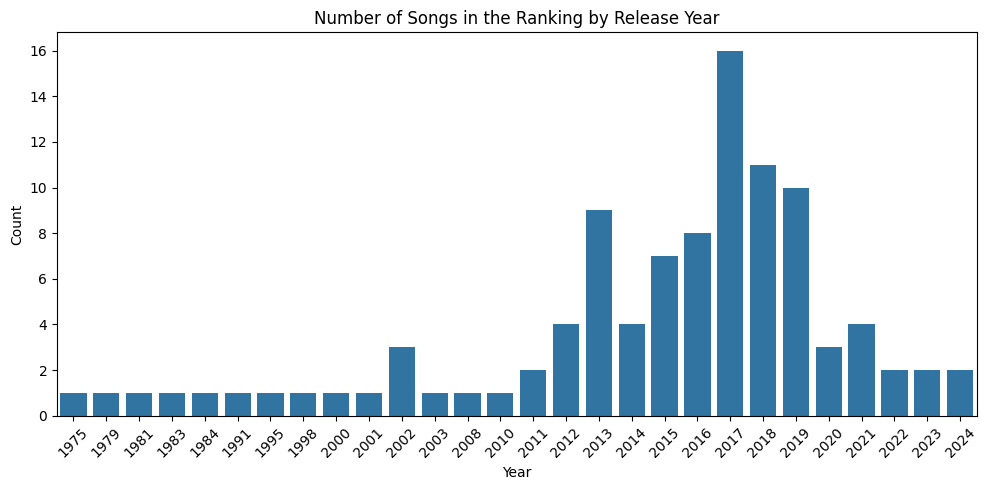

In [ ]:
df["Year"] = df["Date released"].dt.year
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Year", order=sorted(df["Year"].dropna().unique()))
plt.title("Number of Songs in the Ranking by Release Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()